### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [11]:
import numpy as np #Import numpy as np
import pandas as pd #Import pandas as pd
import seaborn as sns #Import seaborn as sns 
import matplotlib.pyplot as plt #Import matplotlib as plt

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [12]:
#Read related CSV files in the dataframe objects
data = pd.read_csv("Data.csv")
user = pd.read_csv("user.csv")
item = pd.read_csv("item.csv")



In [13]:
#make sure we read Data.csv
data.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [14]:
#make sure we read user.csv
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
#make sure we read item.csv
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [16]:
#data get info
#FYI I am doing for all individually I feel this question is related to only Data.csv
#For safety sake I am doing all three
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [17]:
#data get shape
data.shape

(100000, 4)

In [18]:
#describe data
data.describe

<bound method NDFrame.describe of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>

In [19]:
#find number of missing values in data per column
data.isnull().sum()
#Also if we look at data.info()  
#There is entry for non-null constraint that can give us the clue it doesnt have any missing data.

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [20]:
#Get User Info
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [21]:
#Get Shape of the user dataframe
user.shape

(943, 5)

In [22]:
#Describe User dataframe
user.describe

<bound method NDFrame.describe of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [23]:
#Find sum of missing data in user dataframe
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [24]:
#Get Item info
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [25]:
#Get shape of Item
item.shape

(1681, 22)

In [31]:
#Describe item
item.describe

<bound method NDFrame.describe of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Child

In [26]:
#find sum of all missing values in item
item.isnull().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

#### 4. Find the number of movies per genre using the item data - 5 marks

In [27]:
# use sum on the default axis
#Creating a new dataframe with columns dropped which are not necessary for this aggregation.
#Trying to get sum of all the ROWS in each COLUMN which is default behavior gets the expected result.
item_columns_interested = item.drop(['movie id','movie title', 'release date'],inplace=False,axis=1)
item_columns_interested.sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [29]:
#hint: use sum on the axis = 1
item_with_movietitle = item.drop(['movie id','release date'],inplace=False,axis=1) #drop movie id and release date
item_with_movietitle.set_index('movie title', inplace=True) #make movie title the index
#filter only those movie title which have more than one genre
item_with_movietitle.where(item_with_movietitle.sum(numeric_only= True, axis=1)>1).dropna(axis=0)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie title,,,,,,,,,,,,,,,,,,,
Toy Story,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GoldenEye,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Get Shorty,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Copycat,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Twelve Monkeys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MURDER and murder,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Tainted,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Mirage,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
#If you just want the title 
movie_title = item_with_movietitle.where(item_with_movietitle.sum(numeric_only= True, axis=1)>1).dropna(axis=0)
#print title of the movie more than one genre
movie_title.index
#movie_title.index

Index(['Toy Story ', 'GoldenEye ', 'Get Shorty ', 'Copycat ',
       'Twelve Monkeys ', 'Babe ', 'Richard III ', 'Seven (Se7en) ',
       'Usual Suspects, The ', 'Postino, Il ',
       ...
       'Favor, The ', 'Little City ', 'Target ', 'Rough Magic ',
       'Nothing Personal ', 'MURDER and murder ', 'Tainted ', 'Mirage ',
       'B. Monkey ', 'Sliding Doors '],
      dtype='object', name='movie title', length=849)

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [31]:
movieindexes_unknown_genre = item[ (item['unknown'] > 0)].index
item.drop(movieindexes_unknown_genre , inplace=True)
item
#Creating a new dataframe with columns dropped which are not necessary for this aggregation.
#Trying to get sum of all the ROWS in each COLUMN which is default behavior gets the expected result.
#item_columns_interested = item.drop(['movie id','movie title', 'release date'],inplace=False,axis=1)
#print(item_columns_interested.head())
#item_columns_interested.sum()
#validation check


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [32]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [33]:
#Merge Data, User and items to get complete set. Just using inner no need to go out looking for outer, left or right
data_user = pd.merge(data,user,on='user id')
data_user_movie = pd.merge(data_user,item, on='movie id')

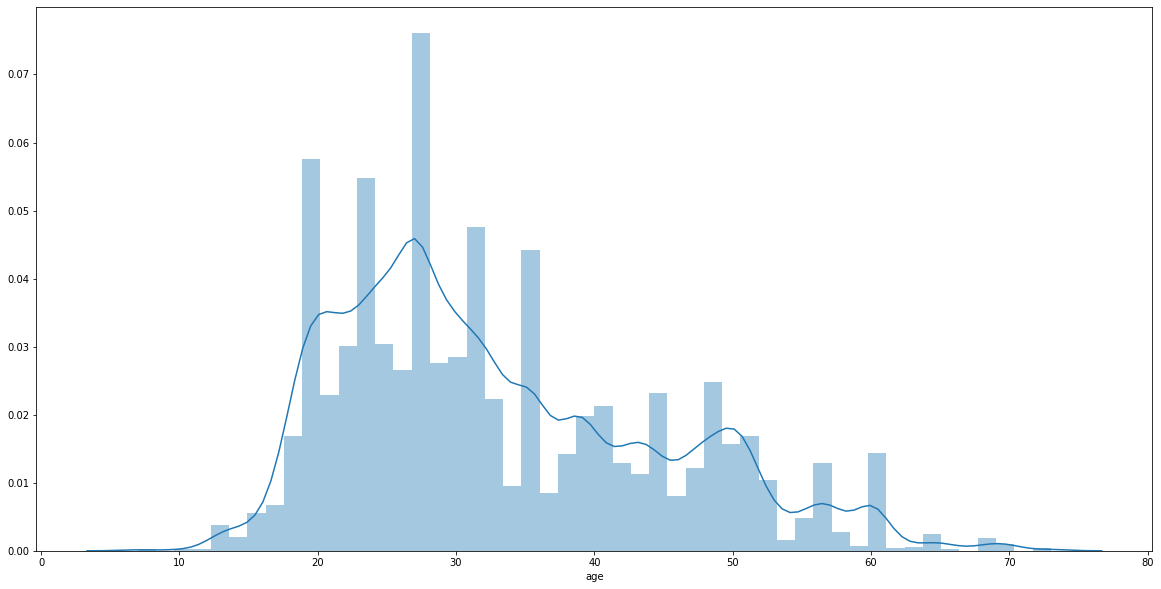

In [10]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.distplot(data_user_movie["age"], kde=True, rug=False);

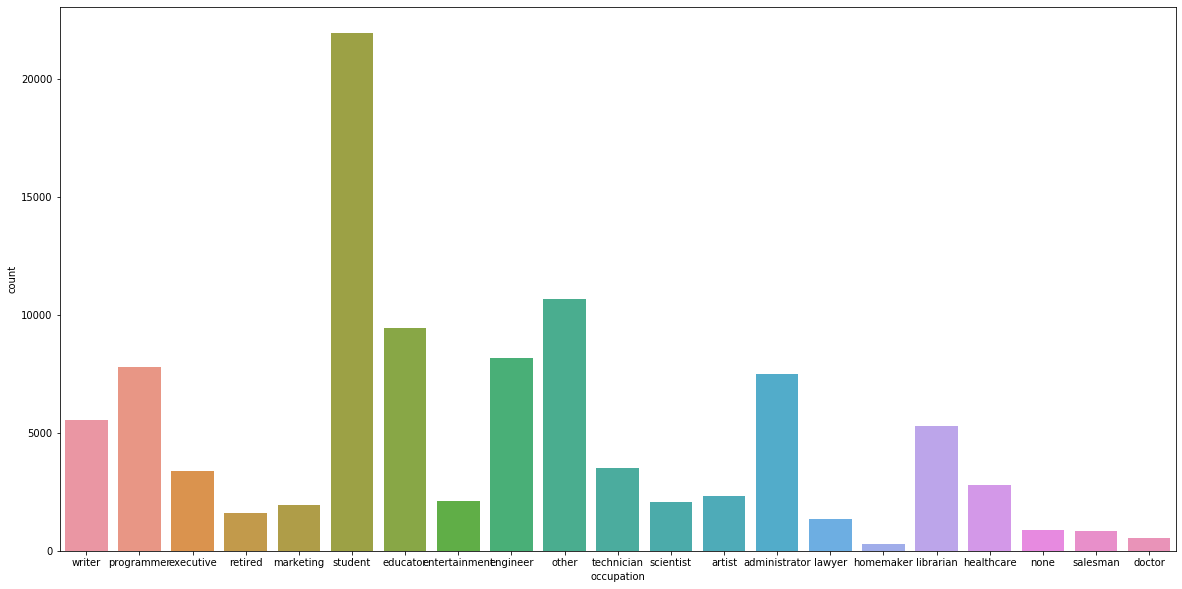

In [34]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.countplot(x="occupation"
              , data=data_user_movie)

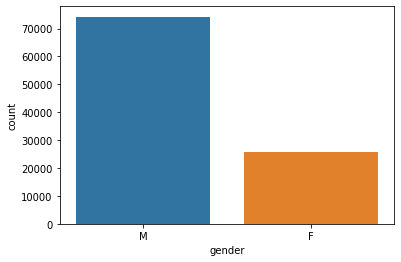

In [35]:
sns.countplot(x="gender"
              , data=data_user_movie)


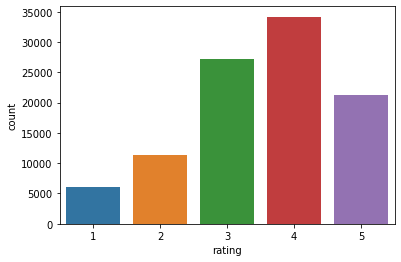

In [36]:
sns.countplot(x="rating"
              , data=data_user_movie)

In [37]:
#Create an extract year method which would be used to extract the year information
def extractYear(row):
    release_date = row['release date']
    return release_date[-4:]
    


In [38]:
data_user_movie['release_year'] = data_user_movie.apply(extractYear,axis=1) #Apply extract year method to get years
data_user_movie.shape

(99990, 30)

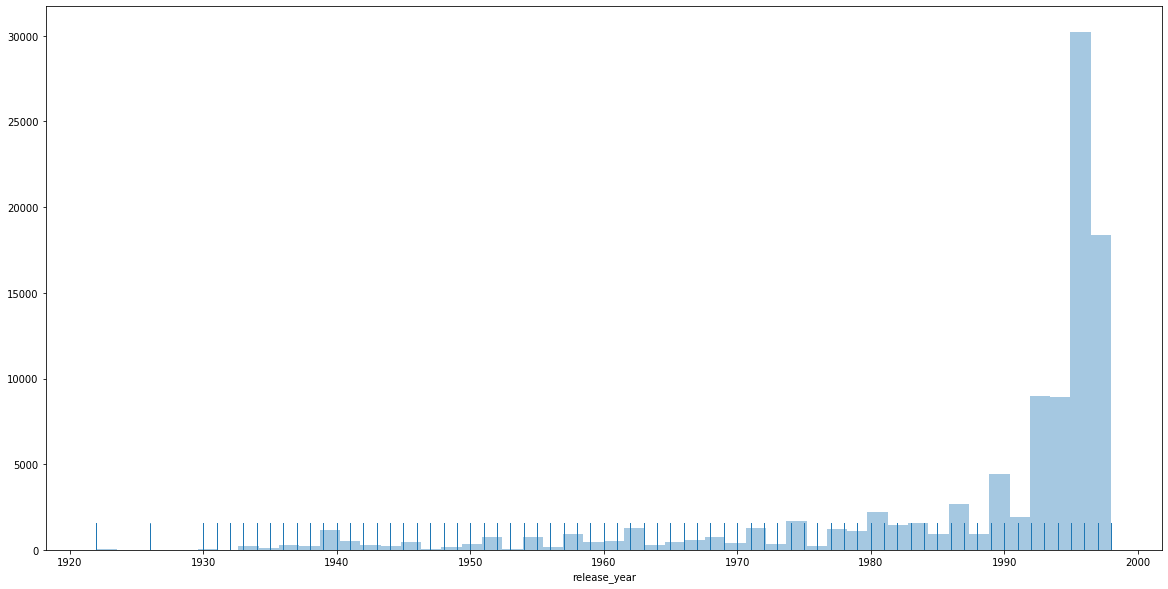

In [39]:
fig, ax = plt.subplots(figsize=(20,10))  
sns.distplot(data_user_movie["release_year"], kde=False, rug=True);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

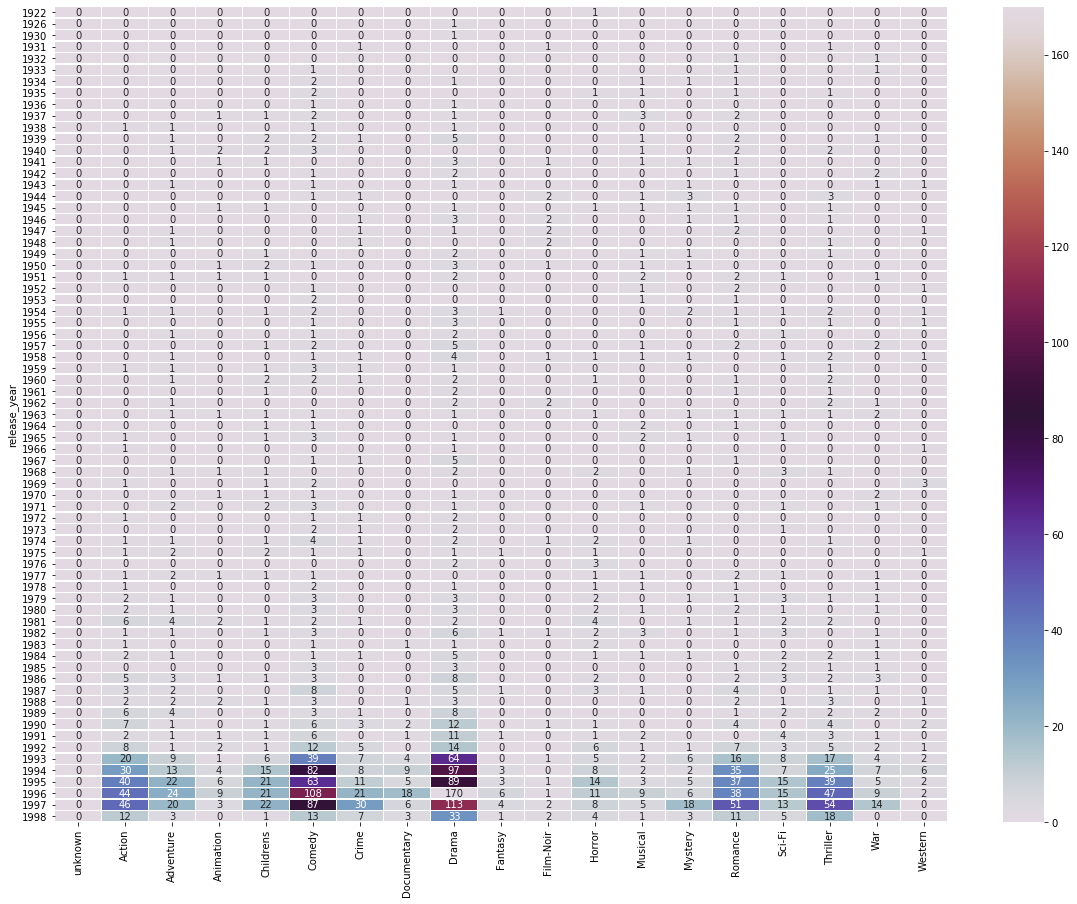

In [40]:
#Your answer here
#Remove Not needed fields 
item_releasedate_genre = item.drop(['movie id','movie title'],inplace=False,axis=1)
#Get Release year for each row
item_releasedate_genre['release_year'] = item_releasedate_genre.apply(extractYear,axis=1)
#Drop Release Date which is not needed anymore
item_releasedate_genre = item_releasedate_genre.drop(['release date'],inplace=False,axis=1)
#Group By Release Year
item_releasedate_genre = item_releasedate_genre.groupby(['release_year']).sum()
#Plot Heat Map
fig, ax = plt.subplots(figsize=(20,15))  
sns.heatmap(item_releasedate_genre, annot=True, fmt="d", cmap="twilight",linewidths=.5)



### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [42]:
#your answer here
#Drop non required columns
data_rating_movieid = data.drop(['user id','timestamp'],inplace=False,axis=1) 
#change index
data_rating_movieid.set_index('movie id', inplace=True)  
#group by movie id and find ratings count
movieid_ratings_gt_100 = data_rating_movieid.groupby(['movie id']).count() 
#filter more than 100 ratings movies
movieid_ratings_gt_100 = movieid_ratings_gt_100[movieid_ratings_gt_100['rating'] >100] 
#filter by average ratings and sort descending 
movieid_ratings_mean = data_rating_movieid.groupby(['movie id']).mean().sort_values(by='rating',ascending=False) 
#merge average ratings and movies with more than 100 ratings
movieid_ratings_mean = movieid_ratings_mean.merge(movieid_ratings_gt_100,on='movie id',suffixes=('_avg','_count'))
#select top 25 records
movieid_ratings_mean = movieid_ratings_mean.nlargest(25,'rating_avg')
#merge with with item to get the movie id and 
movieid_ratings_mean.merge(item,on='movie id')

,movie id,rating_avg,rating_count,movie title,release date,unknown,Action,Adventure,Animation,Childrens,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,408,4.491071,112,"Close Shave, A",28-Apr-1996,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,318,4.466443,298,Schindler's List,01-Jan-1993,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,169,4.466102,118,"Wrong Trousers, The",01-Jan-1993,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,483,4.456790,243,Casablanca,01-Jan-1942,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,64,4.445230,283,"Shawshank Redemption, The",01-Jan-1994,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,603,4.387560,209,Rear Window,01-Jan-1954,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
6,12,4.385768,267,"Usual Suspects, The",14-Aug-1995,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,50,4.358491,583,Star Wars,01-Jan-1977,0,1,1,0,0,...,0,0,0,0,0,1,1,0,1,0
8,178,4.344000,125,12 Angry Men,01-Jan-1957,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,134,4.292929,198,Citizen Kane,01-Jan-1941,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:
This conclusion is based on the % of ratings based on gender. Male have more number compampared to female in ratings

Men watch more drama than women -->False

Women watch more Sci-Fi than men --> False

Men watch more Romance than women --> False



In [43]:
#Get % of male watching drama based on the ratings submitted
data_user = pd.merge(data,user,on='user id')
data_user_movie = pd.merge(data_user,item, on='movie id')


In [44]:
male_ratings = data_user_movie[(data_user_movie['gender']=='M')]
male_ratings.shape

(74252, 29)

In [46]:
female_ratings = data_user_movie[(data_user_movie['gender']=='F')]
female_ratings.shape

(25738, 29)

In [47]:
male_watching_drama = data_user_movie[(data_user_movie['gender']=='M') & (data_user_movie['Drama']==1)]

percentage_male_watching_drama = len(male_watching_drama)/len(male_ratings)*100
percentage_male_watching_drama

38.90400258578893

In [48]:
#Get % of female watching drama based on the ratings submitted
female_watching_drama = data_user_movie[(data_user_movie['gender']=='F') & (data_user_movie['Drama']==1)]

percentage_female_watching_drama = len(female_watching_drama)/len(female_ratings)*100
percentage_female_watching_drama

42.76944595539669

In [49]:
#Get % of male watching scifi based on the ratings submitted
male_watching_scifi = data_user_movie[(data_user_movie['gender']=='M') & (data_user_movie['Sci-Fi']==1)]
percentage_male_watching_scifi = len(male_watching_scifi)/len(male_ratings)*100
percentage_male_watching_scifi

13.603673975111782

In [50]:
#Get % of female watching scifi based on the ratings submitted
female_watching_scifi = data_user_movie[(data_user_movie['gender']=='F') & (data_user_movie['Sci-Fi']==1)]
percentage_female_watching_scifi = len(female_watching_scifi)/len(female_ratings)*100
percentage_female_watching_scifi

10.214468878700753

In [52]:

#Get % of male watching romance based on the ratings submitted
male_watching_romance = data_user_movie[(data_user_movie['gender']=='M') & (data_user_movie['Romance']==1)]
percentage_male_watching_romance = len(male_watching_romance)/len(male_ratings)*100
percentage_male_watching_romance

18.320045251306365

In [54]:
#Get % of female watching romance based on the ratings submitted
female_watching_romance = data_user_movie[(data_user_movie['gender']=='F') & (data_user_movie['Romance']==1)]
percentage_female_watching_romance = len(female_watching_romance)/len(female_ratings)*100
percentage_female_watching_romance

22.760121221540135